In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

# List the files in the dataset directory
dataset_path = '/content/drive/My Drive/split'
files = os.listdir(dataset_path)
print(files)


Mounted at /content/drive
['test', 'train', 'validation']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_folder = '/content/drive/My Drive/split/train'
test_folder = '/content/drive/My Drive/split/test'

# Normalize images
train_gen = ImageDataGenerator(rescale=1./255, validation_split = 0.125)
test_gen = ImageDataGenerator(rescale=1./255)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
train_generator = train_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

val_generator= train_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

test_generator= test_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 19052 images belonging to 10 classes.
Found 2718 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [ ]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
import numpy as np
#Confirm class balance for train and test
train_classes = train_generator.classes
val_classes = val_generator.classes
test_classes = test_generator.classes

#Look at image distribution by class across train, test, and validation sets.
train_class, train_count = np.unique(train_classes, return_counts=True)
val_class, val_count = np.unique(val_classes, return_counts=True)
test_class, test_count = np.unique(test_classes, return_counts=True)

print('Train ~ {}'.format(list(zip(train_class, train_count))))
print('Validation ~ {}'.format(list(zip(val_class, val_count))))
print('Test ~ {}'.format(list(zip(test_class, test_count))))

Train ~ [(0, 2118), (1, 2109), (2, 2100), (3, 1759), (4, 1759), (5, 1418), (6, 1759), (7, 2135), (8, 1777), (9, 2118)]
Validation ~ [(0, 302), (1, 301), (2, 300), (3, 251), (4, 251), (5, 202), (6, 251), (7, 305), (8, 253), (9, 302)]
Test ~ [(0, 600), (1, 600), (2, 600), (3, 500), (4, 500), (5, 400), (6, 500), (7, 600), (8, 500), (9, 600)]


In [ ]:
#Checking the classes in our train data
train_class_names = train_generator.class_indices
print('Train:', train_class_names)

#Checking the classes in our validation data
val_class_names = val_generator.class_indices
print('Validation:', val_class_names)

#Checking the classes in our test data
test_class_names = test_generator.class_indices
print('Train:', test_class_names)

Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [ ]:
# Preview the shape of both the images and labels for both the train, validation, and test sets (8 objects total)
print("Train")
print(np.shape(train_images))
print(np.shape(train_labels))
print("Validation")
print(np.shape(val_images))
print(np.shape(val_labels))
print("Test")
print(np.shape(test_images))
print(np.shape(test_labels))

Train
(128, 256, 256, 3)
(128, 10)
Validation
(128, 256, 256, 3)
(128, 10)
Test
(128, 256, 256, 3)
(128, 10)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


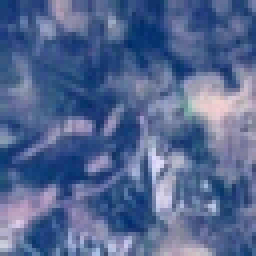

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
# Preview a train data image
print(train_labels[0])
array_to_img(train_images[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


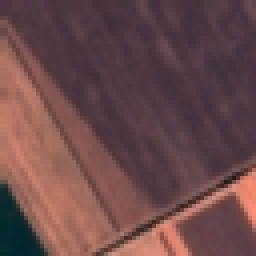

In [ ]:
# Preview a test data image
print(test_labels[0])
array_to_img(test_images[0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Instantiate a Sequential model
baseline_model = Sequential()


# Input Layer- Convolution
baseline_model.add(Conv2D(filters=32,
                          kernel_size=(3, 3),
                          activation='relu',
                          input_shape= (256, 256, 3)))


# Layer 1- max pool in 2x2 window
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2- connect all nodes with dense layer
baseline_model.add(Flatten())
baseline_model.add(Dense(64, activation='relu'))

# Output Layer- softmax activiation for multi-categorical with 10 classes
baseline_model.add(Dense(10, activation='softmax'))

#Compile the sequential CNN model- adam optimizer,
# categorical_crossentropy loss, and set our metric to accuracy
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
baseline_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      33,032,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,033,802 (126.01 MB)

 Trainable params: 33,033,802 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = baseline_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # You can adjust the number of epochs
    steps_per_epoch=train_generator.samples // 128,
    validation_steps=val_generator.samples // 128
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 4589s 30s/step - accuracy: 0.1923 - loss: 5.6887 - val_accuracy: 0.4963 - val_loss: 1.4381
Epoch 2/20
  1/148 ━━━━━━━━━━━━━━━━━━━━ 17:17 7s/step - accuracy: 0.4766 - loss: 1.3684

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4766 - loss: 1.3684 - val_accuracy: 0.4667 - val_loss: 1.4080
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1213s 8s/step - accuracy: 0.5429 - loss: 1.2961 - val_accuracy: 0.5975 - val_loss: 1.1351
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6562 - loss: 1.0551 - val_accuracy: 0.6333 - val_loss: 0.9674
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1209s 8s/step - accuracy: 0.6277 - loss: 1.0815 - val_accuracy: 0.6124 - val_loss: 1.0487
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6641 - loss: 0.9174 - val_accuracy: 0.5000 - val_loss: 1.1190
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1216s 8s/step - accuracy: 0.6890 - loss: 0.9136 - val_accuracy: 0.6998 - val_loss: 0.8486
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7422 - loss: 0.7332 - val_accuracy: 0.6667 - val_loss: 0.8155
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1211s 8s/step - accuracy: 0.7308 - loss: 0.7757 - val_accuracy: 0.699

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = baseline_model.evaluate(test_generator, steps=test_generator.samples // 128)
print(f'Test accuracy: {test_accuracy}')


42/42 ━━━━━━━━━━━━━━━━━━━━ 1003s 24s/step - accuracy: 0.7178 - loss: 0.8855
Test accuracy: 0.7250744104385376


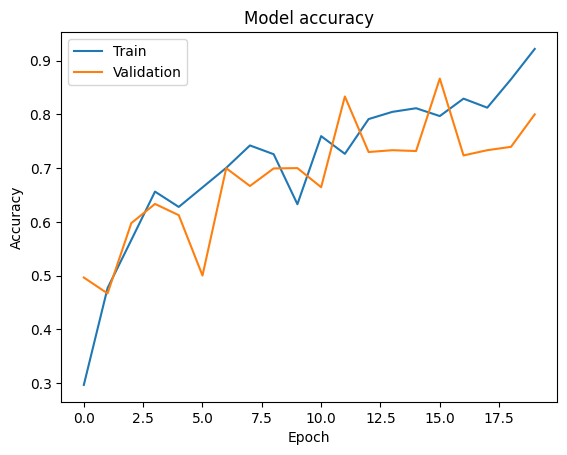

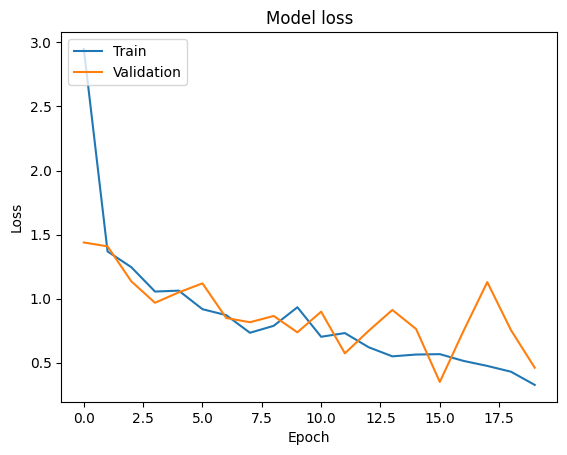

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Get predictions
predictions = baseline_model.predict(test_generator, steps=test_generator.samples // 128)
predicted_classes = np.argmax(predictions, axis=1)

# Print some prediction examples
for i in range(10):
    print(f"True label: {test_classes[i]}, Predicted label: {predicted_classes[i]}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step
True label: 0, Predicted label: 3
True label: 0, Predicted label: 0
True label: 0, Predicted label: 8
True label: 0, Predicted label: 0
True label: 0, Predicted label: 3
True label: 0, Predicted label: 2
True label: 0, Predicted label: 8
True label: 0, Predicted label: 0
True label: 0, Predicted label: 3
True label: 0, Predicted label: 0


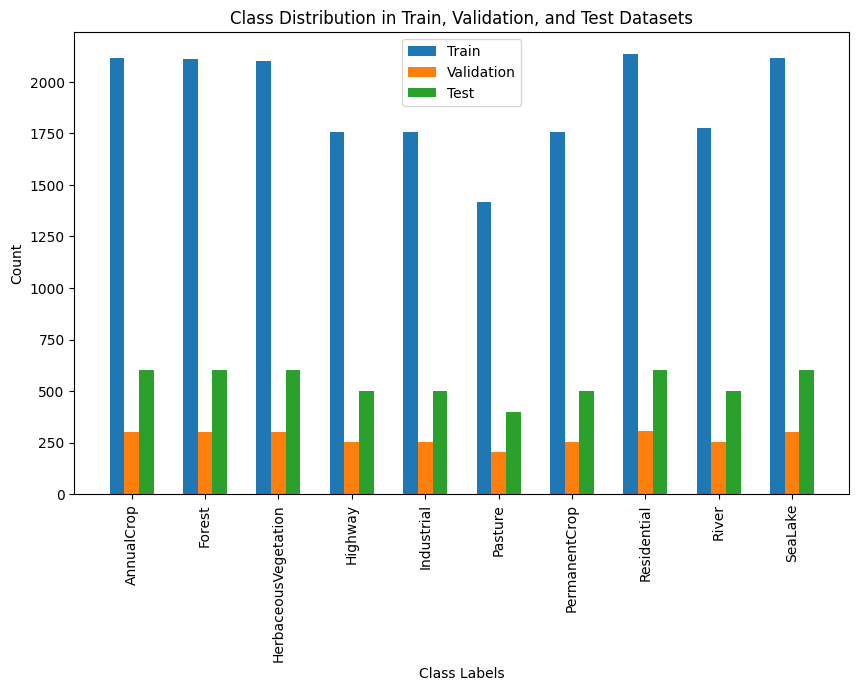

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar chart
labels = list(train_class_names.keys())
train_counts = [train_count[train_class_names[label]] for label in labels]
val_counts = [val_count[val_class_names[label]] for label in labels]
test_counts = [test_count[test_class_names[label]] for label in labels]

x = range(len(labels))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, train_counts, width=0.2, label='Train')
ax.bar([p + 0.2 for p in x], val_counts, width=0.2, label='Validation')
ax.bar([p + 0.4 for p in x], test_counts, width=0.2, label='Test')

# Adding labels and title
ax.set_xlabel('Class Labels')
ax.set_ylabel('Count')
ax.set_title('Class Distribution in Train, Validation, and Test Datasets')
ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Display the plot
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to datasets
train_folder_1 = '/content/drive/My Drive/split/train'
test_folder_1 = '/content/drive/My Drive/split/test'
train_folder_2 = '/content/drive/My Drive/split/test'
test_folder_2 = '/content/drive/My Drive/split/train'

# Define ImageDataGenerators (make sure this is executed)
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.125)  # Define train_gen
test_gen = ImageDataGenerator(rescale=1./255)  # Define test_gen

# Generators for Dataset 1 (Base Year)
train_gen_1 = train_gen.flow_from_directory(train_folder_1, class_mode='categorical', subset='training', batch_size=128, shuffle=True, seed=42)
val_gen_1 = train_gen.flow_from_directory(train_folder_1, class_mode='categorical', subset='validation', batch_size=128, shuffle=True, seed=42)
test_gen_1 = test_gen.flow_from_directory(test_folder_1, class_mode='categorical', batch_size=128, shuffle=False, seed=42)

# Generators for Dataset 2 (Comparison Year)
test_gen_2 = test_gen.flow_from_directory(test_folder_2, class_mode='categorical', batch_size=128, shuffle=False, seed=42)

Found 19052 images belonging to 10 classes.
Found 2718 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 21770 images belonging to 10 classes.


In [ ]:
# Train the model on Dataset 1
history_1 = baseline_model.fit(
    train_gen_1,
    validation_data=val_gen_1,
    epochs=20,
    steps_per_epoch=train_gen_1.samples // 128,
    validation_steps=val_gen_1.samples // 128
)


NameError: name 'baseline_model' is not defined

In [ ]:
# Evaluate on Dataset 2
predictions_2 = baseline_model.predict(test_gen_2, steps=test_gen_2.samples // 128)
predicted_classes_2 = np.argmax(predictions_2, axis=1)

# Evaluate on Dataset 1 (for comparison)
predictions_1 = baseline_model.predict(test_gen_1, steps=test_gen_1.samples // 128)
predicted_classes_1 = np.argmax(predictions_1, axis=1)

# Compare results (e.g., change detection)
changes = predicted_classes_1 != predicted_classes_2
change_count = np.sum(changes)

print(f"Total changed pixels: {change_count}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step
Total changed pixels: 0


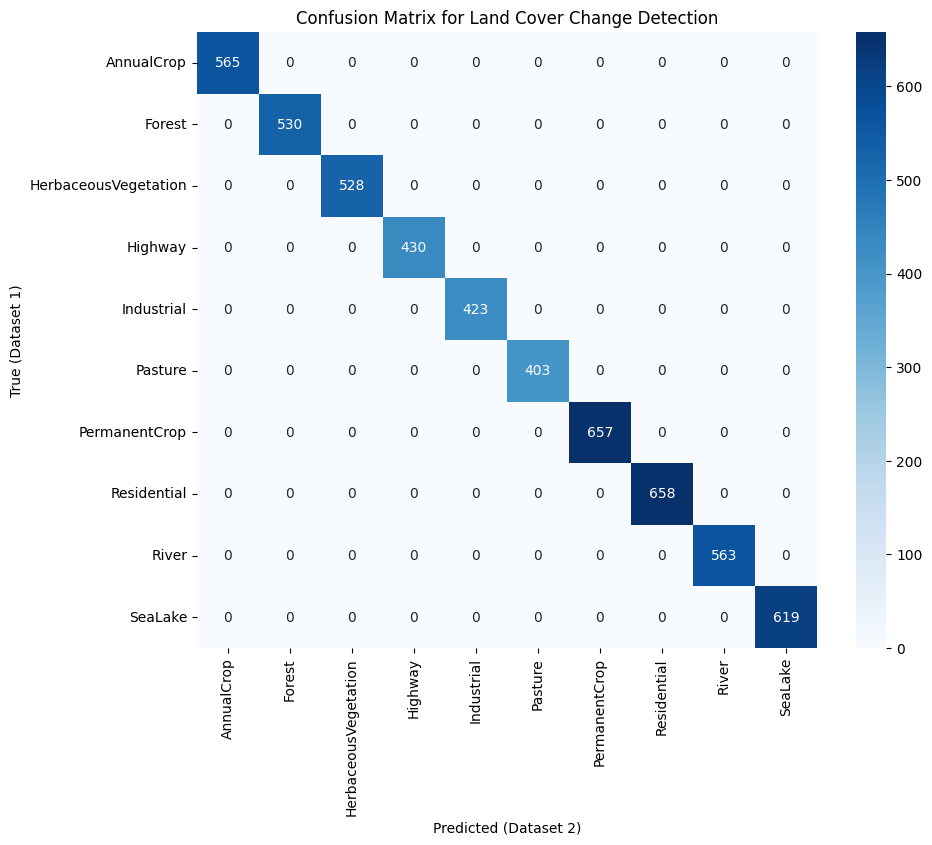

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix between the two datasets
cm = confusion_matrix(predicted_classes_1, predicted_classes_2)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_class_names.keys(), yticklabels=train_class_names.keys())
plt.xlabel('Predicted (Dataset 2)')
plt.ylabel('True (Dataset 1)')
plt.title('Confusion Matrix for Land Cover Change Detection')
plt.show()


In [ ]:
import ee
import geemap
from google.colab import auth

# Authenticate and initialize Earth Engine
auth.authenticate_user()
ee.Initialize(project='refined-veld-438916-d9')

# Define Area of Interest (AOI) - Chennai
chennai = ee.Geometry.Polygon([
  [[79.8, 13.1], [80.4, 13.1], [80.4, 13.4], [79.8, 13.4]]
])

# Function to mask clouds using QA60 band
def maskClouds(image):
    qa60 = image.select('QA60')
    mask = qa60.bitwiseAnd(1 << 10).eq(0)
    return image.updateMask(mask)

# Function to classify land cover
def classify(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')  # B8 (NIR), B4 (Red)
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')  # B3 (Green), B8 (NIR)
    ndbi = image.normalizedDifference(['B11', 'B8']).rename('NDBI')  # B11 (SWIR), B8 (NIR)

    landcover = (ndvi.gt(0.3).multiply(1)
                 .add(ndwi.gt(0.2).multiply(2))
                 .add(ndbi.gt(0.2).multiply(3)))
    return image.addBands(landcover.rename('landcover'))

# Load Sentinel-2 imagery for two years
image_2015 = ee.ImageCollection('COPERNICUS/S2')\
                .filterBounds(chennai)\
                .filterDate('2015-01-01', '2015-12-31')\
                .map(maskClouds)\
                .median()\
                .clip(chennai)

image_2024 = ee.ImageCollection('COPERNICUS/S2')\
                .filterBounds(chennai)\
                .filterDate('2024-01-01', '2024-12-31')\
                .map(maskClouds)\
                .median()\
                .clip(chennai)

# Classify images
classified_2015 = classify(image_2015)
classified_2024 = classify(image_2024)

# Calculate land cover change
change = classified_2024.select('landcover').subtract(classified_2015.select('landcover'))

# Visualization parameters
vis_params = {
    'min': -2,
    'max': 2,
    'palette': ['red', 'white', 'green']  # Loss, No change, Gain
}

# Display map
Map = geemap.Map()
Map.centerObject(chennai, 10)
Map.addLayer(change, vis_params, 'Land Cover Change')
Map.addLayer(classified_2015.select('landcover'), {'min': 0, 'max': 3, 'palette': ['blue', 'green', 'yellow', 'brown']}, '2015 Land Cover')
Map.addLayer(classified_2024.select('landcover'), {'min': 0, 'max': 3, 'palette': ['blue', 'green', 'yellow', 'brown']}, '2024 Land Cover')
Map

/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2

  warnings.warn(warning, category=DeprecationWarning)


Map(center=[13.25014439801928, 80.09999999999968], controls=(WidgetControl(options=['position', 'transparent_b…